In [7]:
import numpy as np
import matplotlib.pyplot as plt

### On Your Bike!

In [36]:
N = 201
P, m, v_lim = 400, 80, 7
v, v[0] = np.zeros(N), 0
dt, t = 1, np.arange(0, N, dt)

for i in t[:-1]:
    if v[i] < v_lim:
        v[i + 1] = v[i] + P/(v_lim*m) * dt
    else:
        v[i + 1] = v[i] + P/(m*v[i]) * dt - 0.5*1.204*0.33*v[i]**2/m * dt

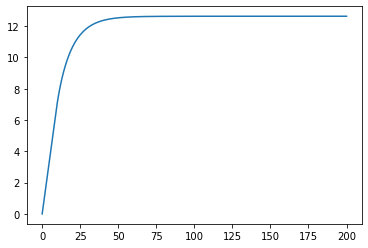

In [37]:
plt.plot(t, v)
plt.show()

### Projectile Motion

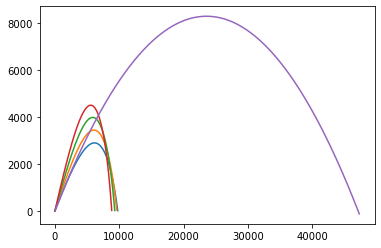

In [108]:
thetas = np.arange(35, 55, 5)

for theta in thetas:
    N, v, v[0], theta = 241, np.zeros(N), 700, theta*np.pi/180
    dt, t = 0.25, np.arange(0, dt*N, dt)
    v_x, v_x[0] = np.zeros(N), v[0]*np.cos(theta)
    v_z, v_z[0] = np.zeros(N), v[0]*np.sin(theta)
    x, z = np.zeros(N), np.zeros(N)
    B = 4e-5

    for i in range(N-1):
        x[i + 1] = x[i] + v_x[i] * dt
        z[i + 1] = z[i] + v_z[i] * dt
        v_x[i + 1] = v_x[i] - B*v[i]*v_x[i]
        v_z[i + 1] = v_z[i] - 9.8*dt - B*v[i]*v_z[i]
        v[i + 1] = np.sqrt(v_x[i + 1]**2 + v_z[i + 1]**2)
    plt.plot(x[:np.where(z<=0)[0][1]], z[:np.where(z<=0)[0][1]])

N, v_in, theta = 331, 700, 35*np.pi/180
dt, t = 0.25, np.arange(0, dt*N, dt)
v_x, v_x[0] = np.zeros(N), v_in*np.cos(theta)
v_z, v_z[0] = np.zeros(N), v_in*np.sin(theta)
x, z = np.zeros(N), np.zeros(N)

for i in range(N-1):
    x[i + 1] = x[i] + v_x[i] * dt
    z[i + 1] = z[i] + v_z[i] * dt
    v_x[i + 1] = v_x[i]
    v_z[i + 1] = v_z[i] - 9.8*dt
plt.plot(x, z)

plt.show()

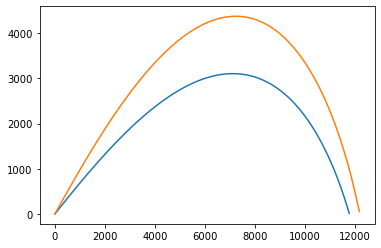

In [122]:
# With density correction:
thetas = [35, 45]

for theta in thetas:
    N, v, v[0], theta = 281, np.zeros(N), 700, theta*np.pi/180
    dt, t = 0.25, np.arange(0, dt*N, dt)
    v_x, v_x[0] = np.zeros(N), v[0]*np.cos(theta)
    v_z, v_z[0] = np.zeros(N), v[0]*np.sin(theta)
    x, z = np.zeros(N), np.zeros(N)
    B, z_0, p_0 = 4e-5, 1e4, 1.204
    p, p[0] = np.zeros(N), p_0

    for i in range(N-1):
        x[i + 1] = x[i] + v_x[i] * dt
        z[i + 1] = z[i] + v_z[i] * dt
        v_x[i + 1] = v_x[i] - p[i]/p_0*B*v[i]*v_x[i]
        v_z[i + 1] = v_z[i] - p[i]/p_0*9.8*dt - B*v[i]*v_z[i]
        v[i + 1] = np.sqrt(v_x[i + 1]**2 + v_z[i + 1]**2)
        p[i + 1] = p_0 * np.exp(-z[i + 1]/z_0)
    try:
        plt.plot(x[:np.where(z<=0)[0][1]], z[:np.where(z<=0)[0][1]])
    except:
        plt.plot(x, z)

plt.show()